### Pull in the required libraries

In [29]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
import warnings
warnings.filterwarnings("ignore")
import sweetviz as sv

### Change Directories

In [30]:
os.chdir('P:\\Users\\amayer\\Documents\\GitHub\\Orlando-Magic-GameScore-Stats-and-Graphics-2020_21-Season\\Scripts')

### Load data file

In [31]:
pd.set_option('display.max_columns', None)
magic=pd.read_csv(r'P:\\Users\\amayer\\Documents\\GitHub\\Orlando-Magic-GameScore-Stats-and-Graphics-2020_21-Season\\Data\stats.csv')
magic.head()

,Rk,Player,Age,Pos,Date,Tm,Unnamed: 6,Opp,Unnamed: 8,GmSc,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,TS%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
0,1,Nikola Vučević\vucevni01,30-111,C,2021-02-12,ORL,@,SAC,W,39.5,1,34,17,22,0.773,11,14,0.786,6,8,0.750,2,3,0.667,0.901,1,8,9,4,2,0,1,1,42,24.7
1,2,Nikola Vučević\vucevni01,30-104,C,2021-02-05,ORL,NaN,CHI,W,37.7,1,37,17,29,0.586,13,19,0.684,4,10,0.400,5,6,0.833,0.680,3,16,19,4,0,1,1,2,43,14.2
2,3,Nikola Vučević\vucevni01,30-084,C,2021-01-16,ORL,@,BRK,L,33.1,1,36,14,22,0.636,8,10,0.800,6,12,0.500,0,0,NaN,0.773,4,6,10,7,5,0,4,4,34,18.5
3,4,Nikola Vučević\vucevni01,30-118,C,2021-02-19,ORL,NaN,GSW,W,32.2,1,39,13,23,0.565,11,15,0.733,2,8,0.250,2,2,1.000,0.628,0,16,16,10,1,1,0,1,30,12.5
4,5,Nikola Vučević\vucevni01,30-120,C,2021-02-21,ORL,NaN,DET,W,30.0,1,36,14,27,0.519,12,21,0.571,2,6,0.333,7,7,1.000,0.615,0,12,12,3,1,2,1,2,37,11.7


### Clean data -> Split columns, rename columns, delete original columns

In [32]:
magic[['Name', 'Player_ID']] = magic.Player.str.split('\\', expand=True)

In [33]:
magic[['FirstName', 'LastName']] = magic.Name.str.split(' ', expand=True)

In [34]:
magic = magic.drop(['Player', 'Name'], axis= 1)

In [35]:
magic.rename(columns = {'Unnamed: 6':'H/A', 'Unnamed: 8': 'W/L'}, inplace = True) 

In [36]:
magic.head()

,Rk,Age,Pos,Date,Tm,H/A,Opp,W/L,GmSc,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,TS%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM,Player_ID,FirstName,LastName
0,1,30-111,C,2021-02-12,ORL,@,SAC,W,39.5,1,34,17,22,0.773,11,14,0.786,6,8,0.750,2,3,0.667,0.901,1,8,9,4,2,0,1,1,42,24.7,vucevni01,Nikola,Vučević
1,2,30-104,C,2021-02-05,ORL,NaN,CHI,W,37.7,1,37,17,29,0.586,13,19,0.684,4,10,0.400,5,6,0.833,0.680,3,16,19,4,0,1,1,2,43,14.2,vucevni01,Nikola,Vučević
2,3,30-084,C,2021-01-16,ORL,@,BRK,L,33.1,1,36,14,22,0.636,8,10,0.800,6,12,0.500,0,0,NaN,0.773,4,6,10,7,5,0,4,4,34,18.5,vucevni01,Nikola,Vučević
3,4,30-118,C,2021-02-19,ORL,NaN,GSW,W,32.2,1,39,13,23,0.565,11,15,0.733,2,8,0.250,2,2,1.000,0.628,0,16,16,10,1,1,0,1,30,12.5,vucevni01,Nikola,Vučević
4,5,30-120,C,2021-02-21,ORL,NaN,DET,W,30.0,1,36,14,27,0.519,12,21,0.571,2,6,0.333,7,7,1.000,0.615,0,12,12,3,1,2,1,2,37,11.7,vucevni01,Nikola,Vučević


### Histogram of player GameScores 

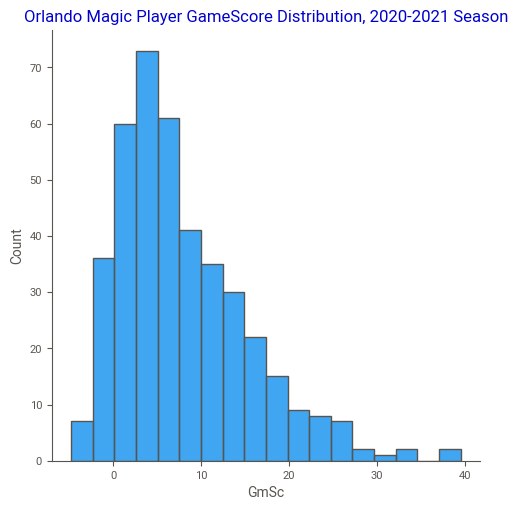

In [37]:
sns.displot(magic['GmSc'])
plt.title("Orlando Magic Player GameScore Distribution, 2020-2021 Season", color='mediumblue')
plt.show()

### Swarmplot by player of their respective GameScores

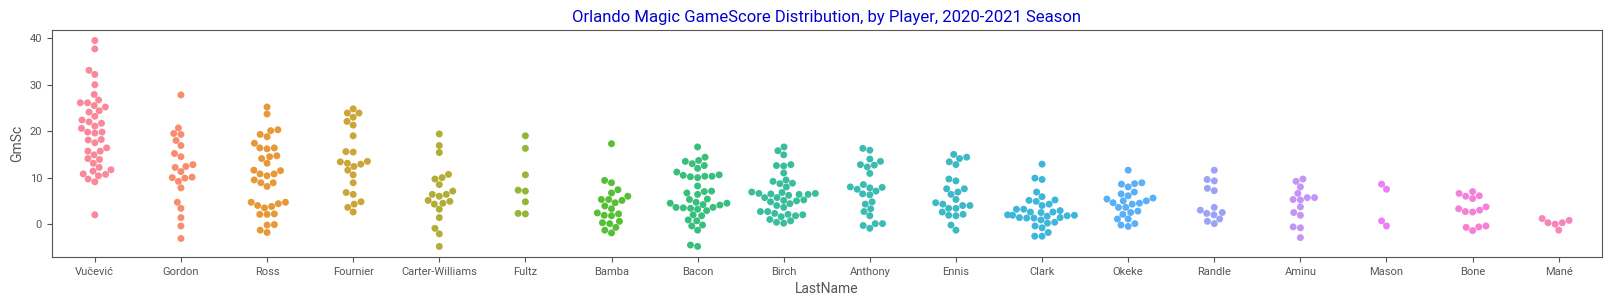

In [38]:
fig, ax = plt.subplots(figsize=(20,3))
sns.swarmplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Player, 2020-2021 Season", color='mediumblue')
plt.show()

### Boxplot by player of their respective GameScores

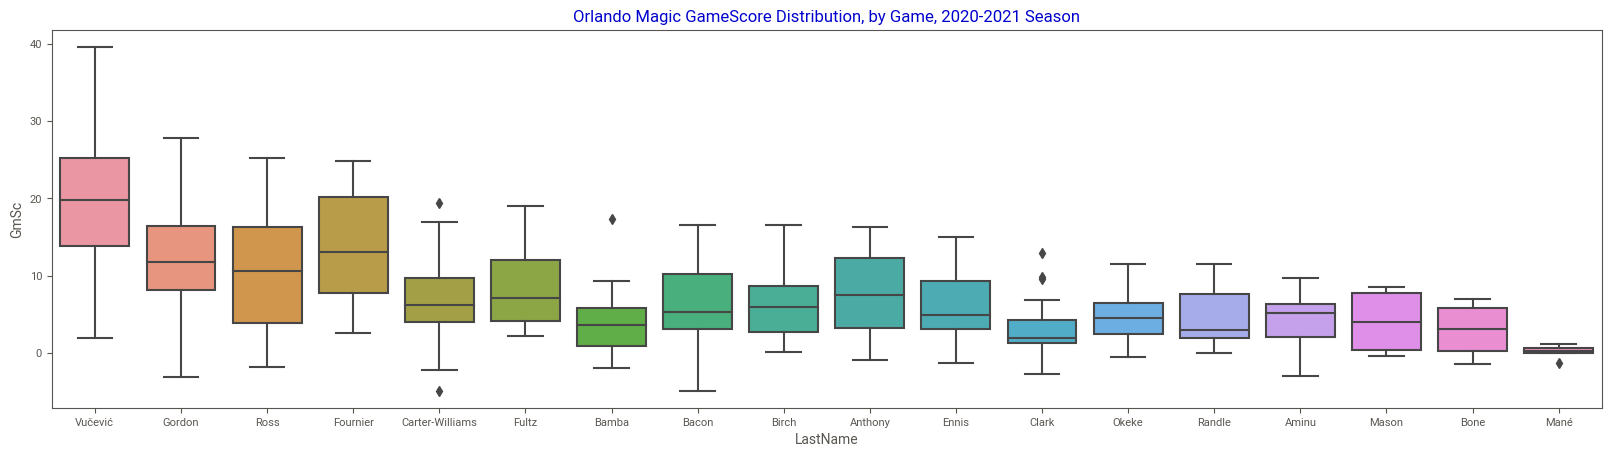

In [39]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Game, 2020-2021 Season", color='mediumblue')
plt.show()

### Scatterplot of GameScores versus minutes played by player 

GameScore versus Minutes Played, by Player


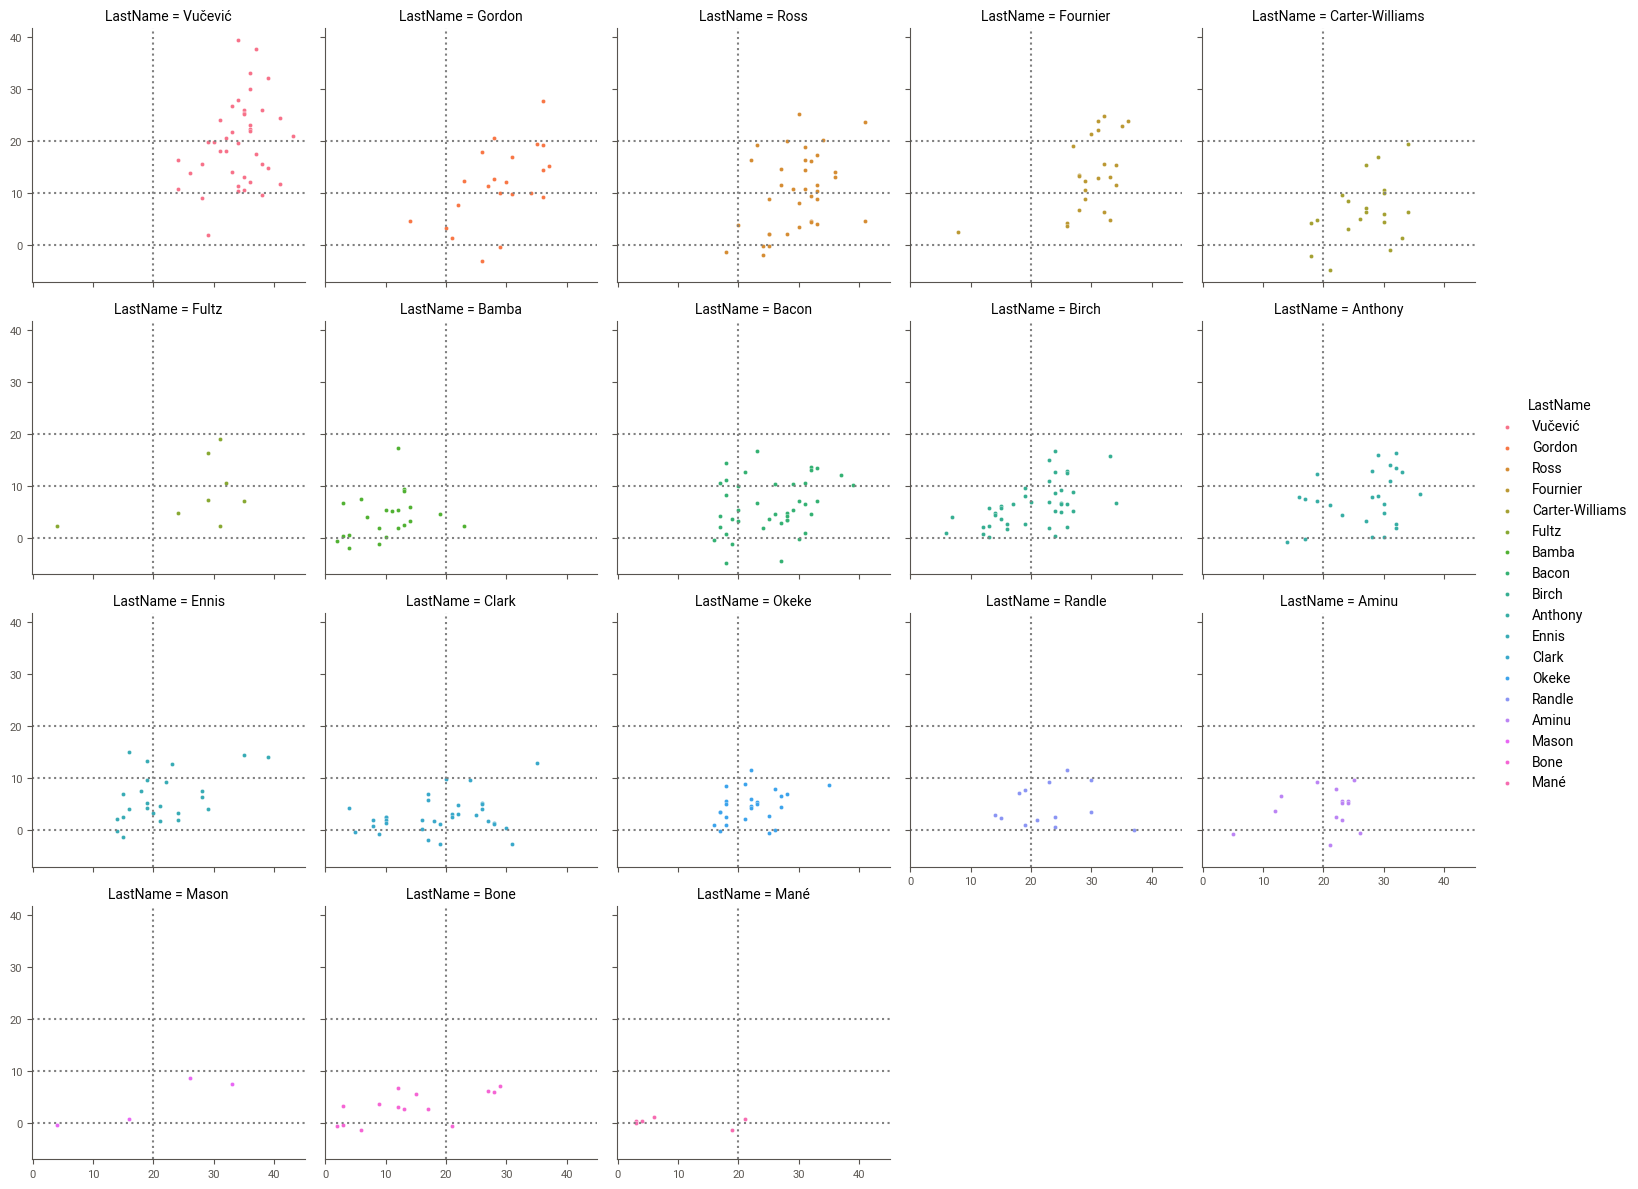

In [40]:
grid = sns.FacetGrid(magic, col = 'LastName', hue = 'LastName', col_wrap=5)
grid.map(sns.scatterplot, 'MP', 'GmSc')
grid.map(plt.axhline, y=10, ls=":", c=".5")
grid.map(plt.axhline, y=20, ls=":", c=".5")
grid.map(plt.axhline, y=0, ls=":", c=".5")
grid.map(plt.axvline, x=20, ls=":", c=".5")
grid.add_legend()
print ("\033[1m"+(colored("GameScore versus Minutes Played, by Player", 'blue'))+"\033[0m")
plt.show() 
# Minutes played on x-axis, GameScore on y-axis

### Ranking of GameScores by game

GameScore versus Date Game Played, by GmSc Rank


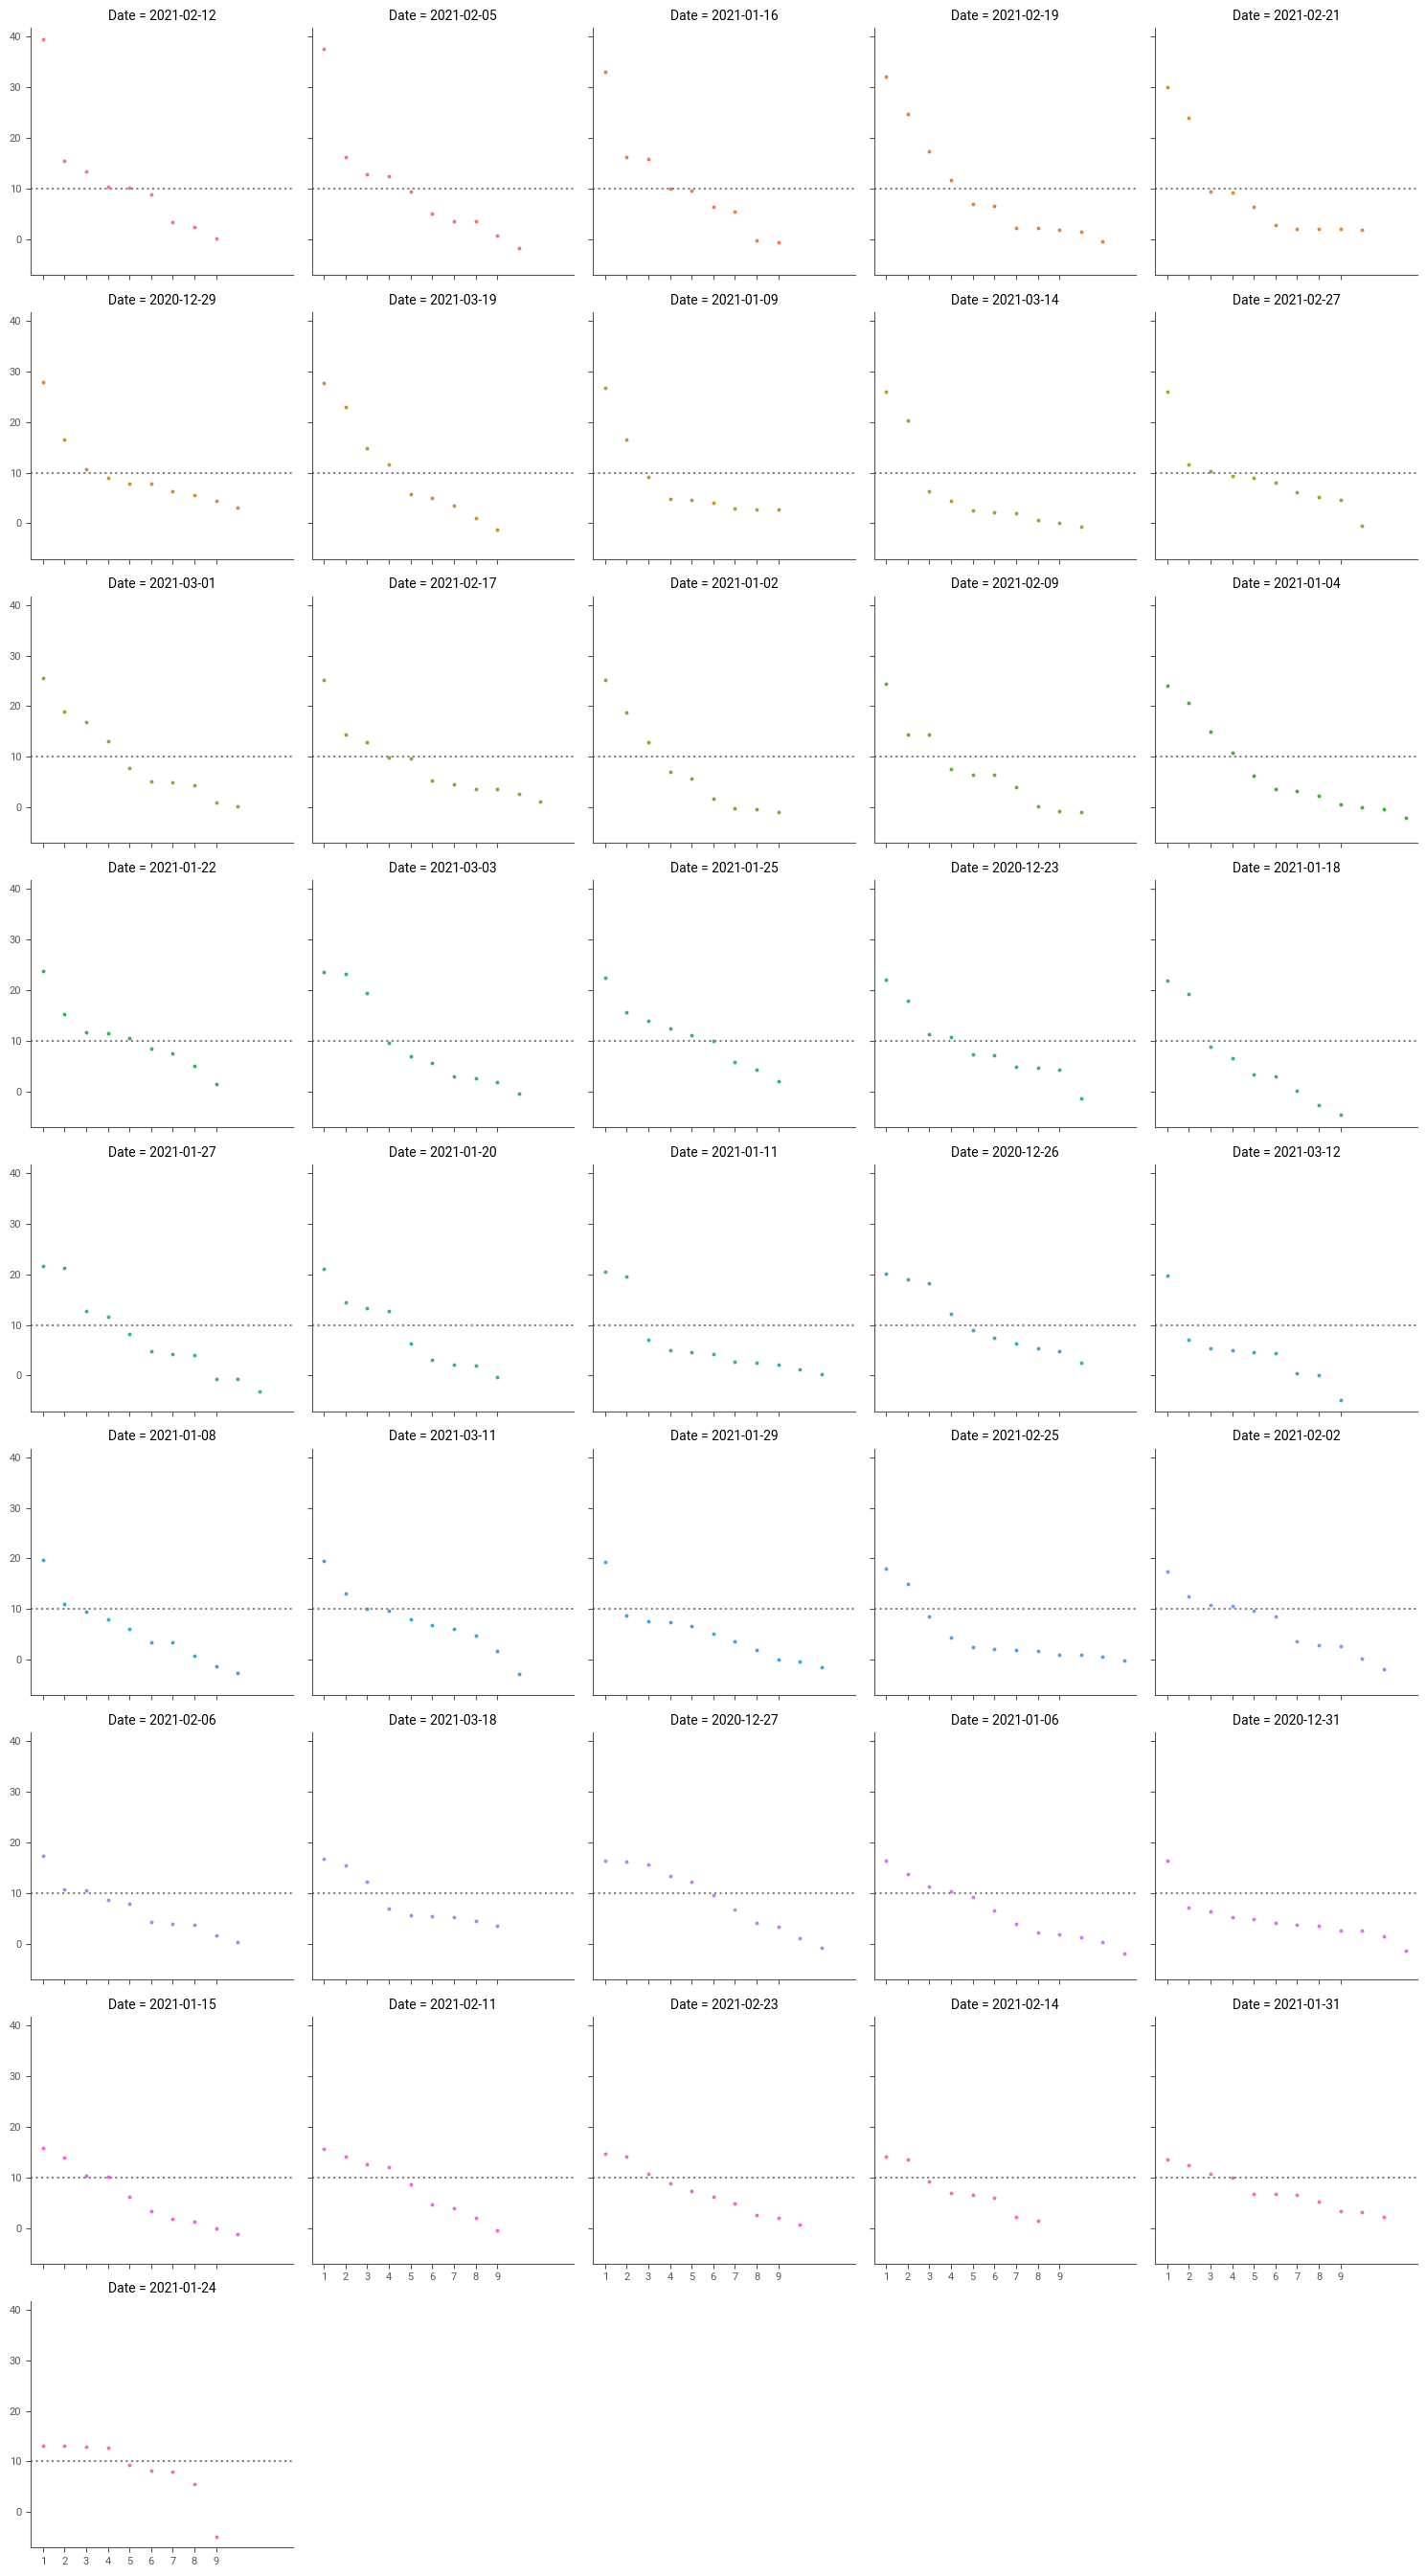

In [41]:
grid = sns.FacetGrid(magic, col = 'Date', hue = 'Date', col_wrap=5)
grid.map(sns.scatterplot, 'LastName', 'GmSc')
grid.set(xlabel="Player", ylabel="GameScore")
grid.set(xticklabels=[1,2,3,4,5,6,7,8,9,10,11])
grid.map(plt.axhline, y=10, ls=":", c=".5")
print ("\033[1m"+(colored("GameScore versus Date Game Played, by GmSc Rank", 'blue'))+"\033[0m")
plt.show() 
# x-axis shows highest GmSc on left, lowest on right for each game. Games ordered by highest game score (in the #1 position on x-axis)
# GmSc of >= 10 are considered above average performace. Points above the dashed line are 'above average'performances.

### Descriptive statistics for each player

In [42]:
print ("\033[1m"+(colored("Descriptive Statistics for GameScore, by Player", 'blue'))+"\033[0m")
magic[['LastName','GmSc']].\
groupby(['LastName'], as_index=True).describe()

Descriptive Statistics for GameScore, by Player


GmSc                                                       
                count       mean       std  min     25%    50%     75%   max
LastName                                                                    
Aminu            14.0   4.228571  3.813222 -2.9   2.050   5.25   6.375   9.7
Anthony          25.0   7.356000  5.208893 -0.9   3.300   7.50  12.300  16.3
Bacon            41.0   6.131707  5.187169 -4.8   3.200   5.30  10.300  16.6
Bamba            22.0   4.027273  4.358045 -1.9   0.900   3.60   5.825  17.3
Birch            40.0   6.345000  4.304020  0.2   2.700   5.95   8.725  16.6
Bone             14.0   3.100000  2.936246 -1.4   0.350   3.15   5.875   7.0
Carter-Williams  20.0   6.605000  6.091364 -4.8   4.025   6.20   9.775  19.4
Clark            33.0   2.839394  3.429553 -2.6   1.300   2.00   4.300  12.9
Ennis            24.0   6.379167  4.778573 -1.3   3.200   4.95   9.400  15.0
Fournier         23.0  13.652174  7.117703  2.6   7.850  13.10  20.150  24.8
Fultz             8.0   8.700000  6.215189  2.2   4.175   7.20  12.025  19.0
Gordon           22.0  11.527273  7.453550 -3.1   8.150  11.75  16.475  27.8
Mané              6.0   0.216667  0.856543 -1.3   0.075   0.30   0.675   1.2
Mason             4.0   4.100000  4.605070 -0.4   0.425   4.10   7.775   8.6
Okeke            25.0   4.636000  3.127416 -0.5   2.500   4.60   6.500  11.6
Randle           13.0   4.661538  3.882984  0.1   2.000   3.00   7.700  11.6
Ross             36.0  10.244444  7.383164 -1.8   3.950  10.60  16.250  25.2
Vučević          41.0  19.860976  8.120403  2.0  13.900  19.80  25.200  39.5

### Table sorted by GameScore with minutes played

In [43]:
print ("\033[1m"+(colored("Total Season GameScore, by Player", 'blue'))+"\033[0m")
game_score = magic[['GmSc','LastName','MP']].groupby(['LastName']).sum()
sort_game_score = game_score.sort_values(by=['GmSc'], ascending=False)
print(sort_game_score)

Total Season GameScore, by Player
                  GmSc    MP
LastName                    
Vučević          814.3  1395
Ross             368.8  1065
Fournier         314.0   682
Birch            253.8   812
Gordon           253.6   635
Bacon            251.4  1038
Anthony          183.9   664
Ennis            153.1   513
Carter-Williams  132.1   535
Okeke            115.9   552
Clark             93.7   625
Bamba             88.6   223
Fultz             69.6   215
Randle            60.6   300
Aminu             59.2   282
Bone              43.4   197
Mason             16.4    79
Mané               1.3    56


### Table sorted by minutes played with GameScore

In [44]:
print ("\033[1m"+(colored("Total Minutes Played, by Player", 'blue'))+"\033[0m")
game_score = magic[['MP','LastName','GmSc']].groupby(['LastName']).sum()
sort_game_score = game_score.sort_values(by=['MP'], ascending=False)
print(sort_game_score)

Total Minutes Played, by Player
                   MP   GmSc
LastName                    
Vučević          1395  814.3
Ross             1065  368.8
Bacon            1038  251.4
Birch             812  253.8
Fournier          682  314.0
Anthony           664  183.9
Gordon            635  253.6
Clark             625   93.7
Okeke             552  115.9
Carter-Williams   535  132.1
Ennis             513  153.1
Randle            300   60.6
Aminu             282   59.2
Bamba             223   88.6
Fultz             215   69.6
Bone              197   43.4
Mason              79   16.4
Mané               56    1.3


### Sum of all players GameScores for each game, then descending ranked by game

In [45]:
print ("\033[1m"+(colored("Aggregate Team GameScore, by Game", 'blue'))+"\033[0m")
game_score = magic[['GmSc','LastName','Date']].groupby(['Date']).sum()
sort_game_score = game_score.sort_values(by=['GmSc'], ascending=False)
print(sort_game_score)

Aggregate Team GameScore, by Game
             GmSc
Date             
2021-02-19  106.9
2020-12-26  105.0
2021-02-12  103.6
2021-02-05   99.7
2020-12-29   99.2
2020-12-27   98.6
2021-01-25   98.1
2021-03-01   97.8
2021-01-16   95.7
2021-03-03   95.7
2021-01-22   95.5
2021-02-17   93.0
2021-03-19   91.3
2021-02-27   89.7
2021-02-21   89.6
2020-12-23   89.1
2021-01-27   84.2
2021-01-04   83.9
2021-01-31   80.5
2021-01-24   77.9
2021-02-02   77.5
2021-03-11   76.7
2021-02-09   76.2
2021-03-18   76.0
2021-01-06   75.4
2021-01-20   75.2
2021-01-09   74.3
2021-02-11   73.3
2021-02-23   71.7
2021-01-11   70.3
2021-01-02   69.9
2021-02-06   69.3
2021-03-14   64.0
2021-01-15   61.1
2021-02-14   59.8
2021-01-29   58.8
2021-01-08   57.8
2020-12-31   56.7
2021-02-25   56.4
2021-01-18   56.2
2021-03-12   42.1


### Basic statistics for each numerical column

In [46]:
magic.describe()

,Rk,GmSc,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,TS%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
count,411.00000,411.000000,411.000000,411.000000,411.000000,411.000000,398.000000,411.000000,411.000000,376.000000,411.000000,411.000000,354.000000,411.000000,411.000000,236.000000,400.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,402.000000
mean,206.00000,7.965207,0.498783,24.009732,3.856448,8.934307,0.412121,2.652068,5.571776,0.471391,1.204380,3.362530,0.322014,1.527981,1.939173,0.801703,0.510895,1.048662,3.600973,4.649635,2.262774,0.669100,0.408759,1.282238,1.688564,10.445255,-2.249751
std,118.78973,7.371050,0.500608,8.745446,3.359199,6.347887,0.210448,2.544840,4.581147,0.278126,1.443938,2.709956,0.299781,1.905338,2.350651,0.253967,0.241391,1.348013,2.950221,3.534343,2.164920,0.890324,0.717938,1.410121,1.349016,8.627172,9.647819
min,1.00000,-4.800000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.700000
25%,103.50000,2.550000,0.000000,18.000000,1.000000,4.000000,0.286000,1.000000,2.000000,0.300000,0.000000,1.000000,0.000000,0.000000,0.000000,0.650250,0.379750,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000,-7.700000
50%,206.00000,6.400000,0.000000,25.000000,3.000000,7.000000,0.408000,2.000000,4.000000,0.500000,1.000000,3.000000,0.293000,1.000000,1.000000,1.000000,0.506000,1.000000,3.000000,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000,8.000000,-2.800000
75%,308.50000,12.100000,1.000000,31.000000,6.000000,13.000000,0.529000,4.000000,8.000000,0.643000,2.000000,5.000000,0.500000,2.000000,3.000000,1.000000,0.667000,2.000000,5.000000,6.000000,3.000000,1.000000,1.000000,2.000000,3.000000,15.000000,2.800000
max,411.00000,39.500000,1.000000,43.000000,17.000000,29.000000,1.000000,13.000000,21.000000,1.000000,8.000000,13.000000,1.000000,12.000000,13.000000,1.000000,1.500000,10.000000,16.000000,19.000000,10.000000,5.000000,4.000000,7.000000,6.000000,43.000000,60.300000


### Create Sweetviz report

In [47]:
my_report = sv.analyze(magic)
my_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
